In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("hf://datasets/gimmaru/tweet_eval-emotion/data/test-00000-of-00001-3ed6224764d572ad.parquet")

In [37]:
df.describe()

,label
count,1000.00000
mean,1.23200
std,1.22543
min,0.00000
25%,0.00000
50%,1.00000
75%,3.00000
max,3.00000


In [38]:
df.sample(6)

,text,label
980,@user I've finished reading it; simply mind-bl...,3
982,@user im sorry i voted jeans &lt;/3 u look ban...,1
659,#Sad #sentiment does a bad mind-#management as...,3
481,#pissed Hate losing more than Montrezl Harrell...,0
447,I really want a fucking knife that I'm not afr...,0
844,@user Horrible CNN interview. U can't talk ur...,0


In [39]:
df.value_counts("label")

label
0    393
3    268
1    250
2     89
Name: count, dtype: int64

In [40]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [41]:
df.nunique()


text     1000
label       4
dtype: int64

In [42]:
df.value_counts("label")

label
0    393
3    268
1    250
2     89
Name: count, dtype: int64

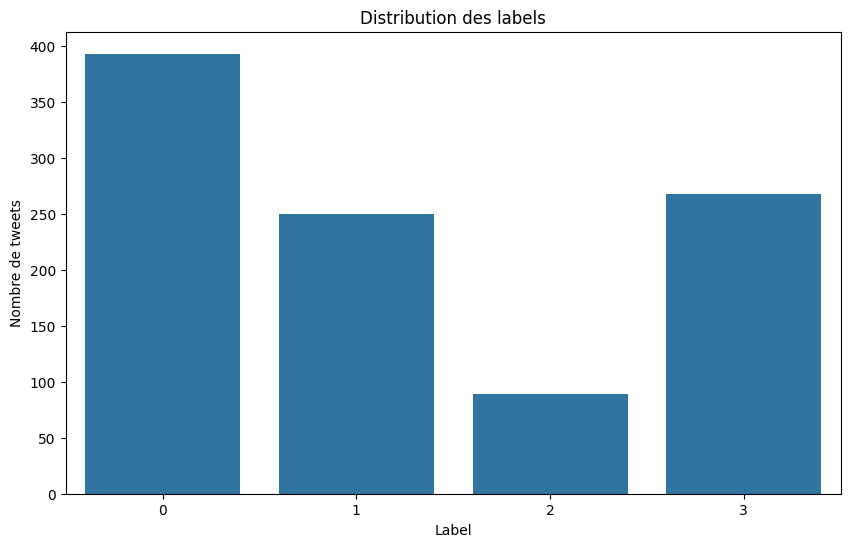

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution des labels')
plt.xlabel('Label')
plt.ylabel('Nombre de tweets')
plt.show()

In [44]:
df['text_length'] = df['text'].apply(len)

print("\n Text length statistics:")
print(df['text_length'].describe())


 Text length statistics:
count    1000.000000
mean       90.050000
std        36.856939
min        10.000000
25%        59.000000
50%        94.000000
75%       124.000000
max       147.000000
Name: text_length, dtype: float64


In [45]:
min_length = df['text_length'].min()
max_length = df['text_length'].max()
print(f"\nMinimum length : {min_length}")
print(f"Maximum length: {max_length}")


Minimum length : 10
Maximum length: 147


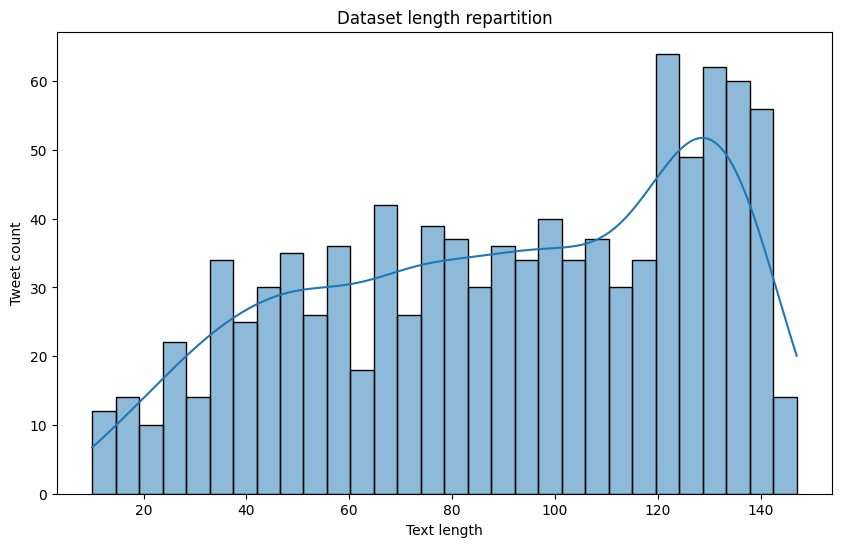

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Dataset length repartition')
plt.xlabel('Text length')
plt.ylabel('Tweet count')
plt.show()

In [47]:
df.to_csv("/home/adam/Documents/github/BERT_finetuned/BERT-fine-tuned/dataset.csv")